# CORRELATION MATRIX

In [54]:
!pip install skfeature-chappers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import *
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

You should consider upgrading via the '/Users/micolrosini/Desktop/dsl project/python_venv/bin/python3 -m pip install --upgrade pip' command.


In [55]:
# Utils functions


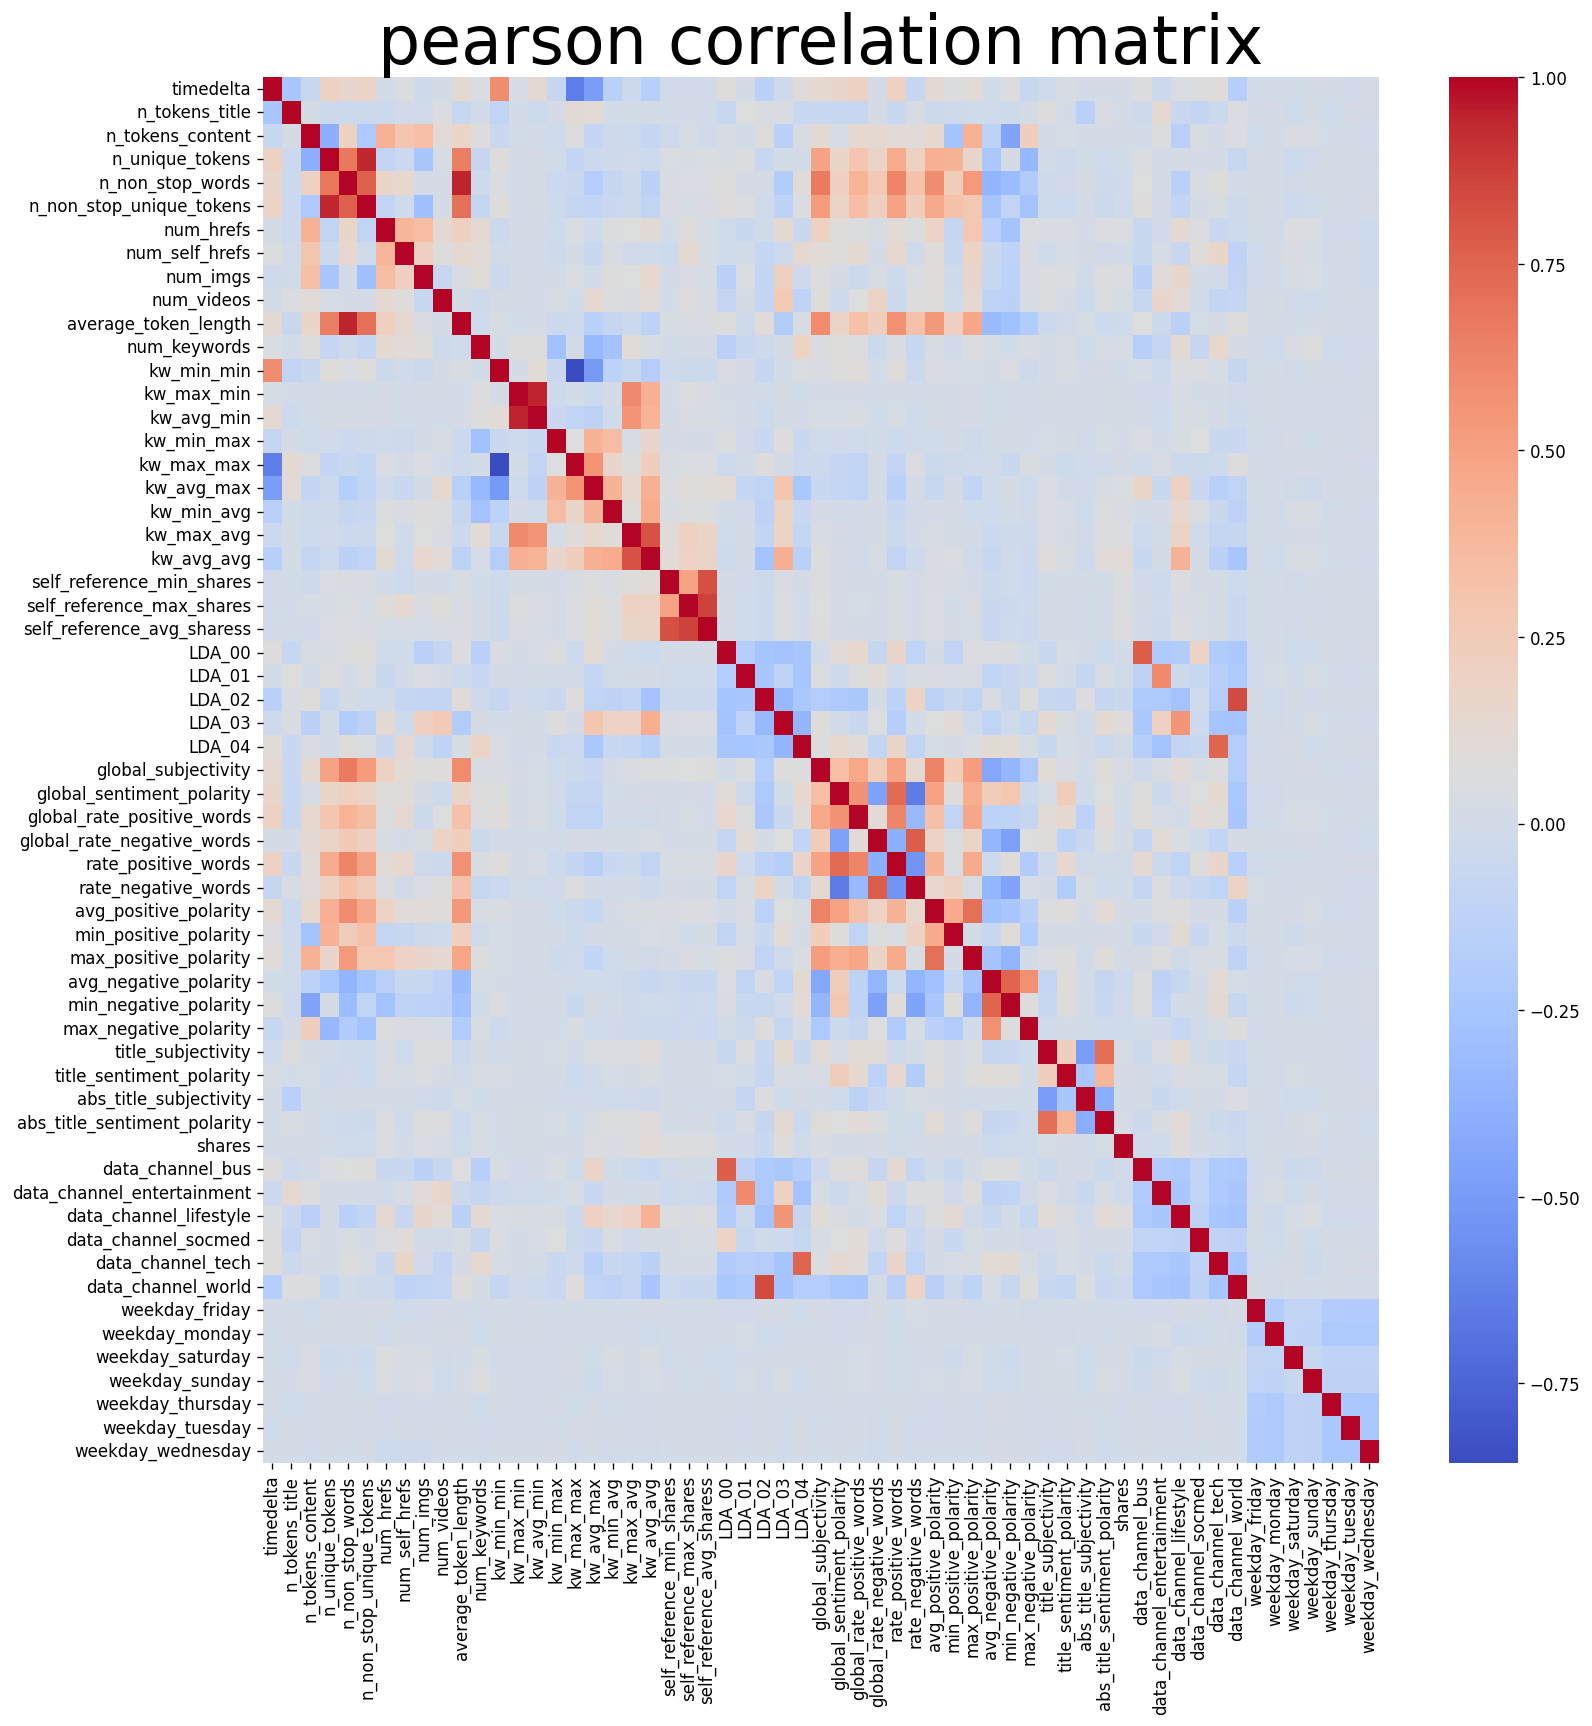

In [56]:
path_dev = "./data/development.csv"
df = pd.read_csv(path_dev)
df.drop(["url","id"], axis = 1, inplace = True)
df = pd.get_dummies(df, columns=['data_channel', 'weekday'])
plot_corr_matrix(df,"pearson")

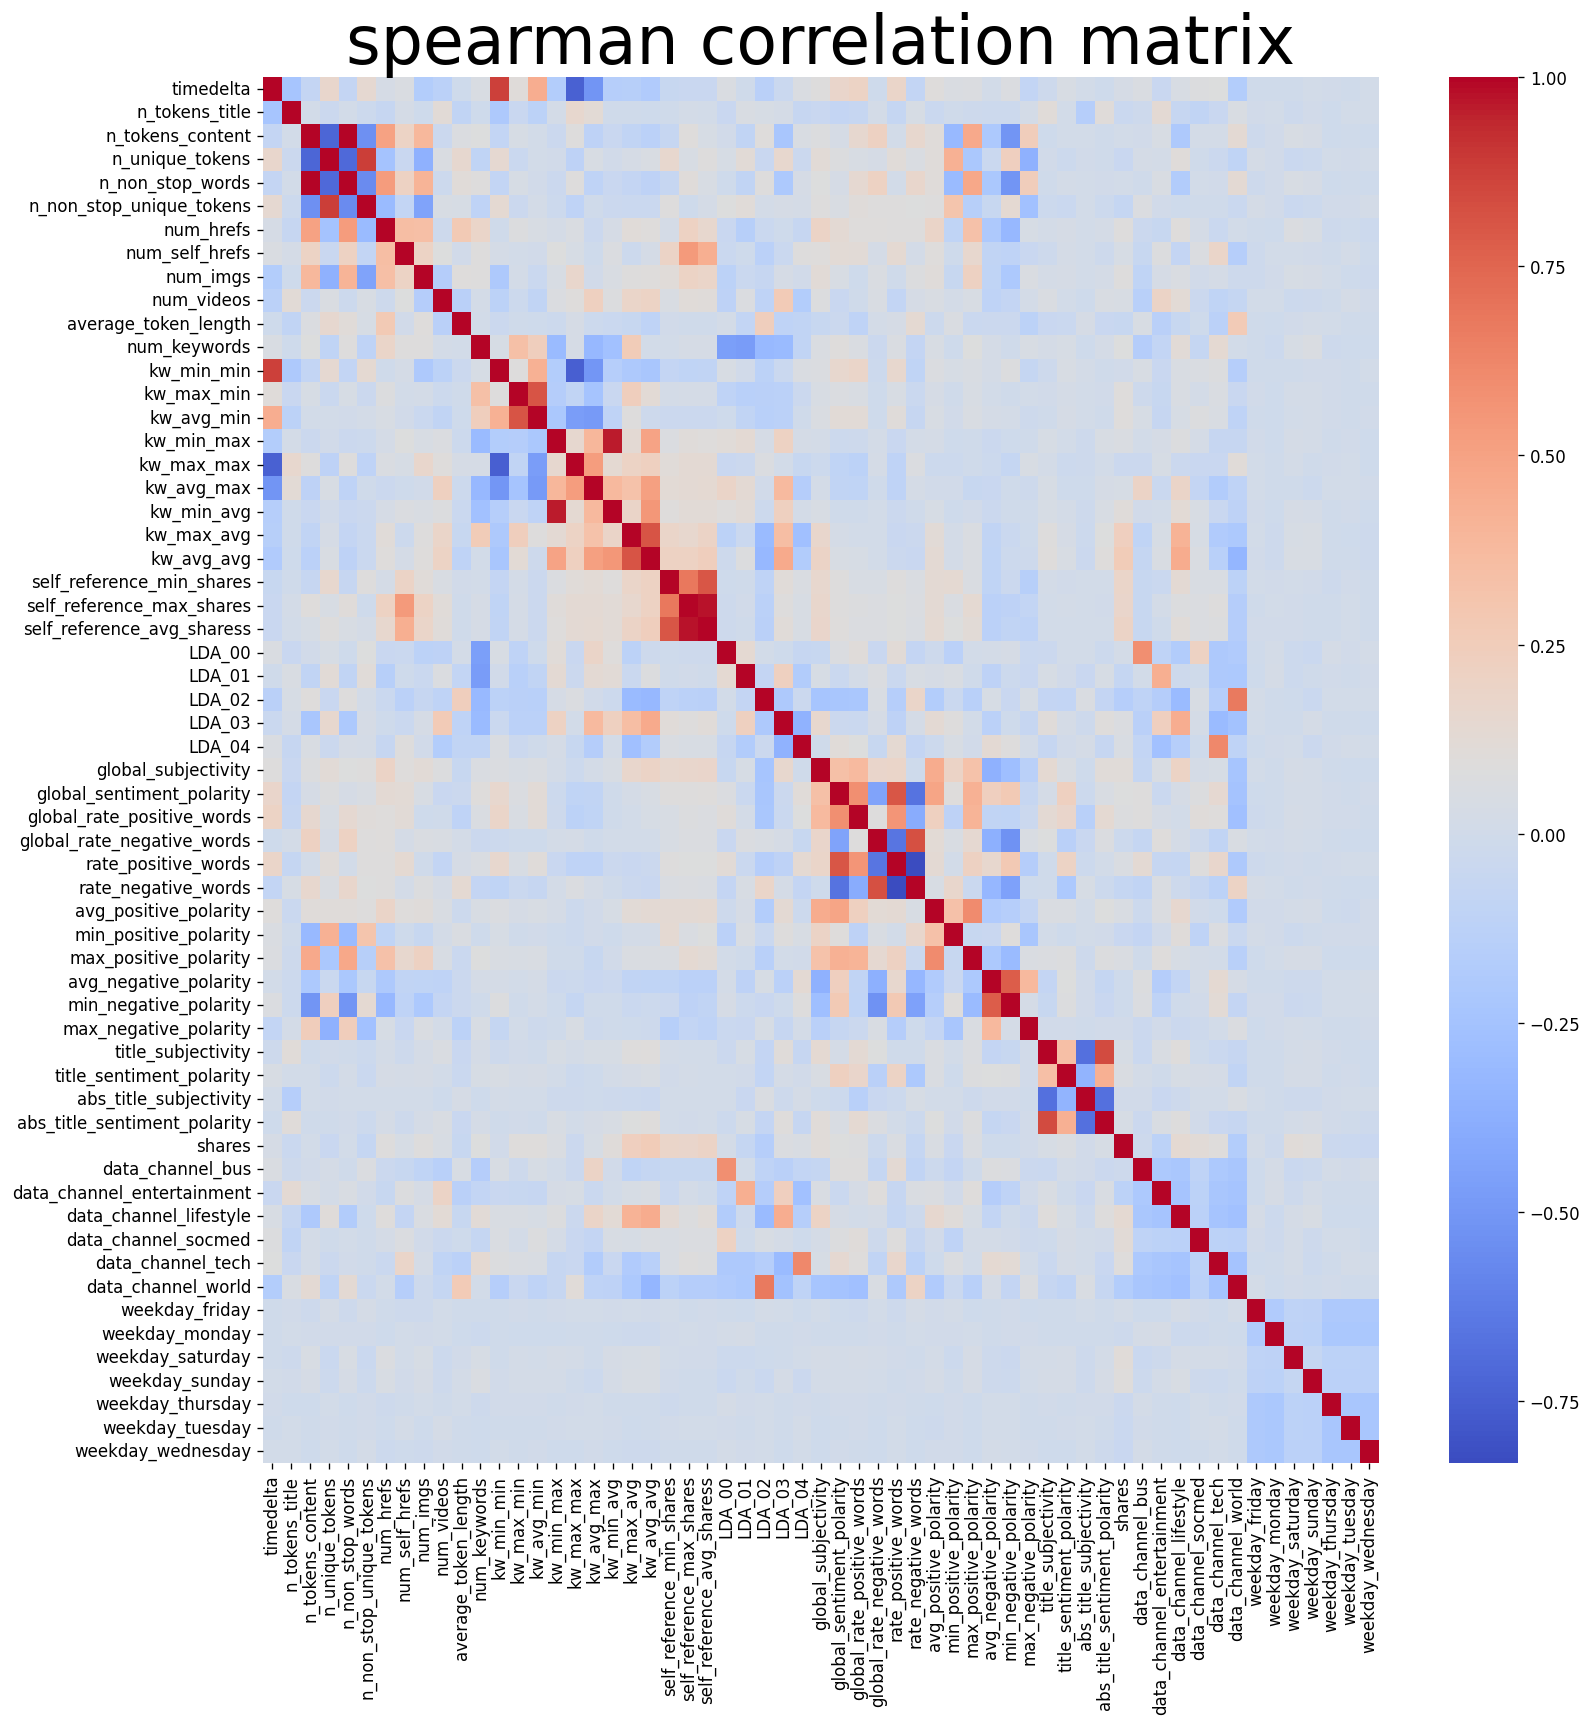

In [57]:
plot_corr_matrix(df,"spearman")

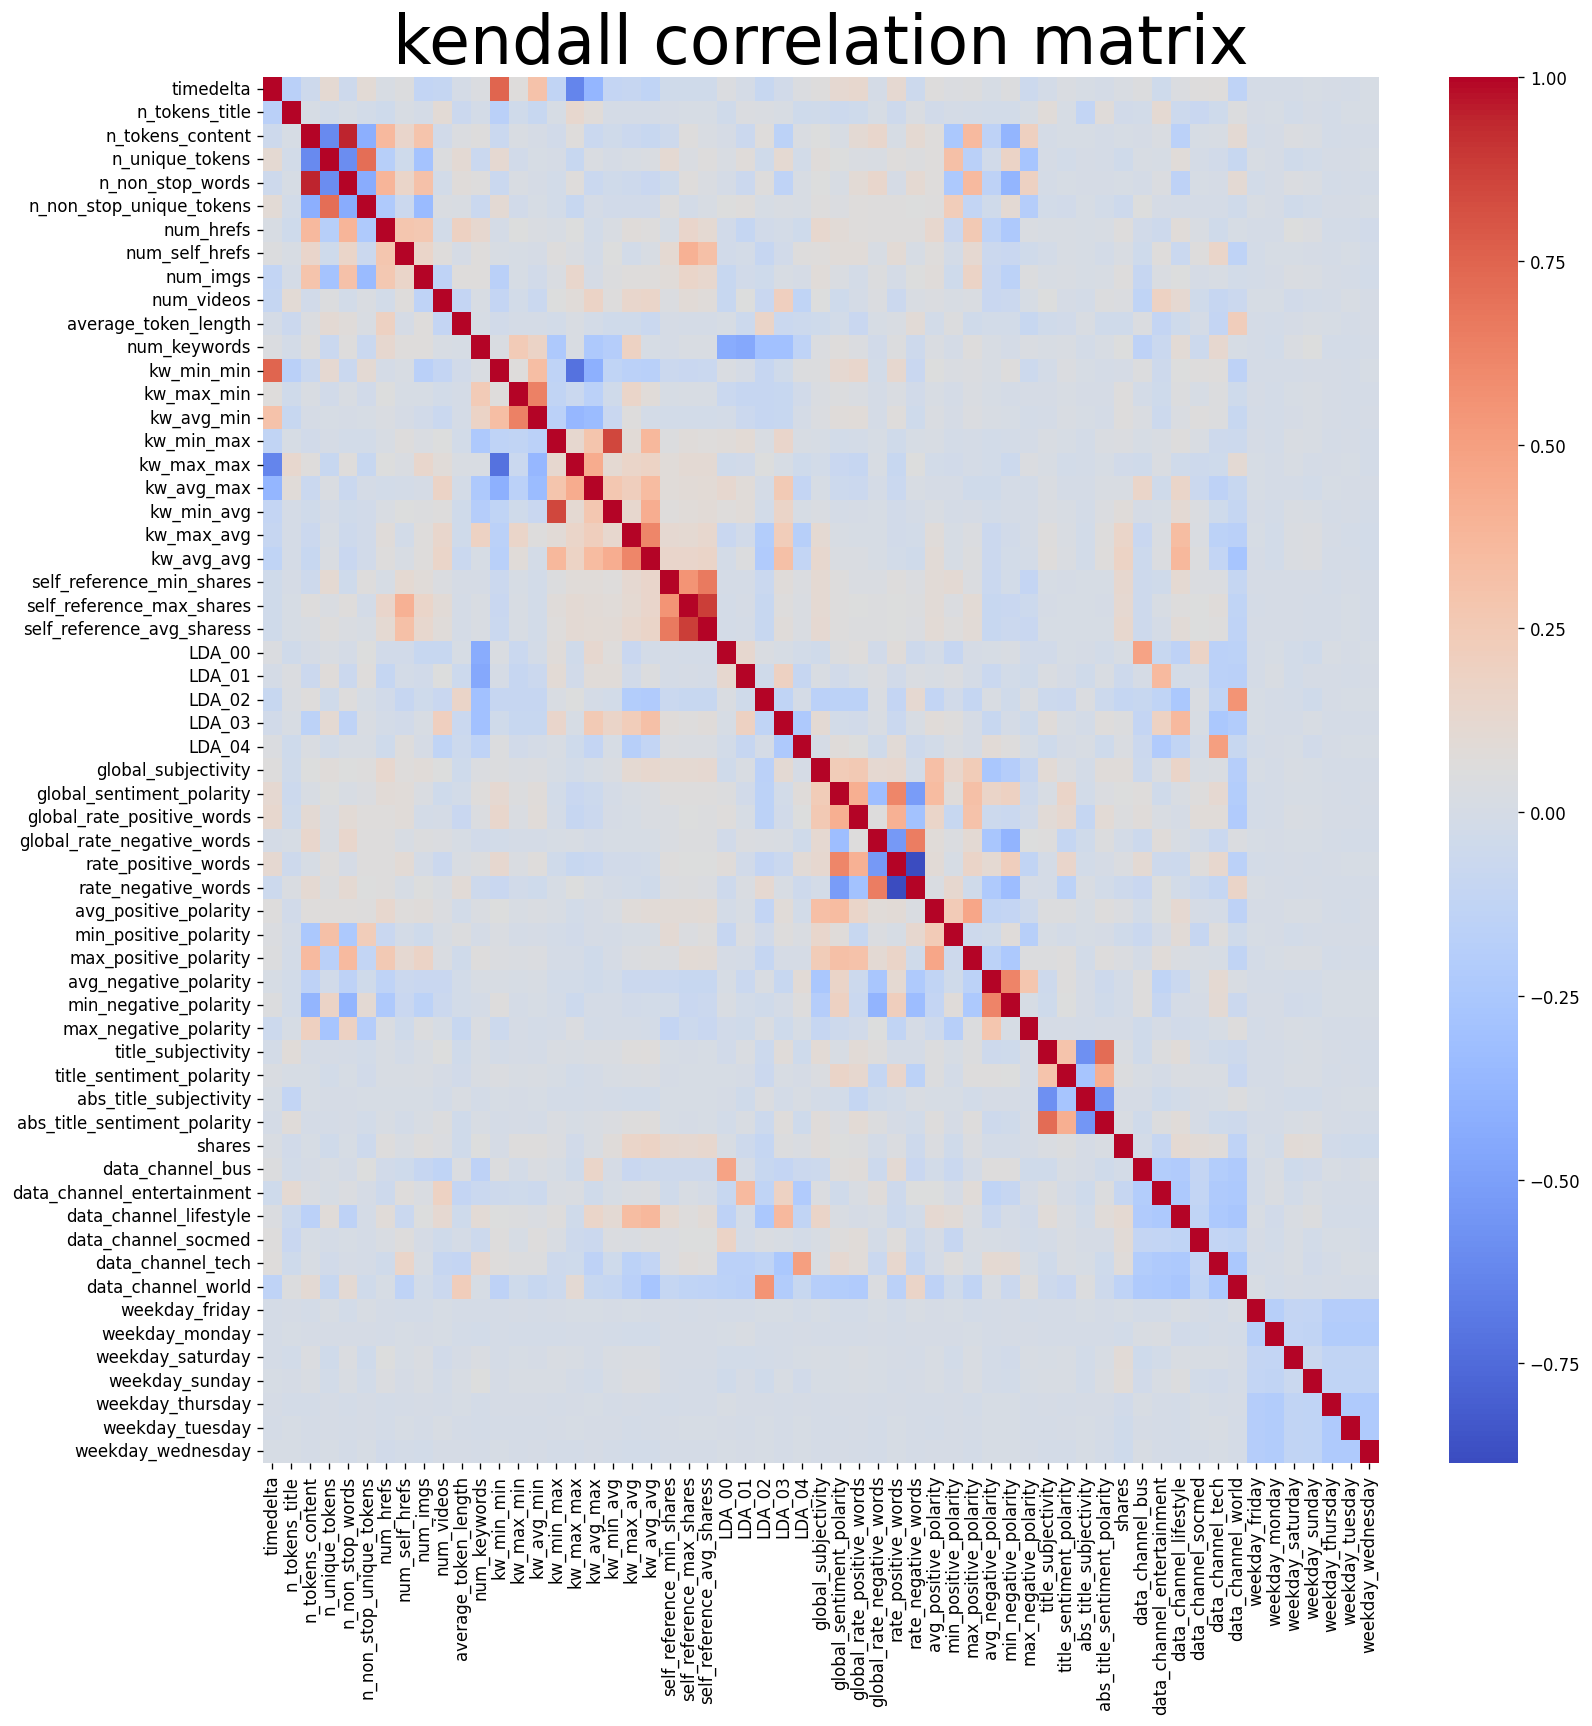

In [58]:
plot_corr_matrix(df,"kendall")

(59, 59)


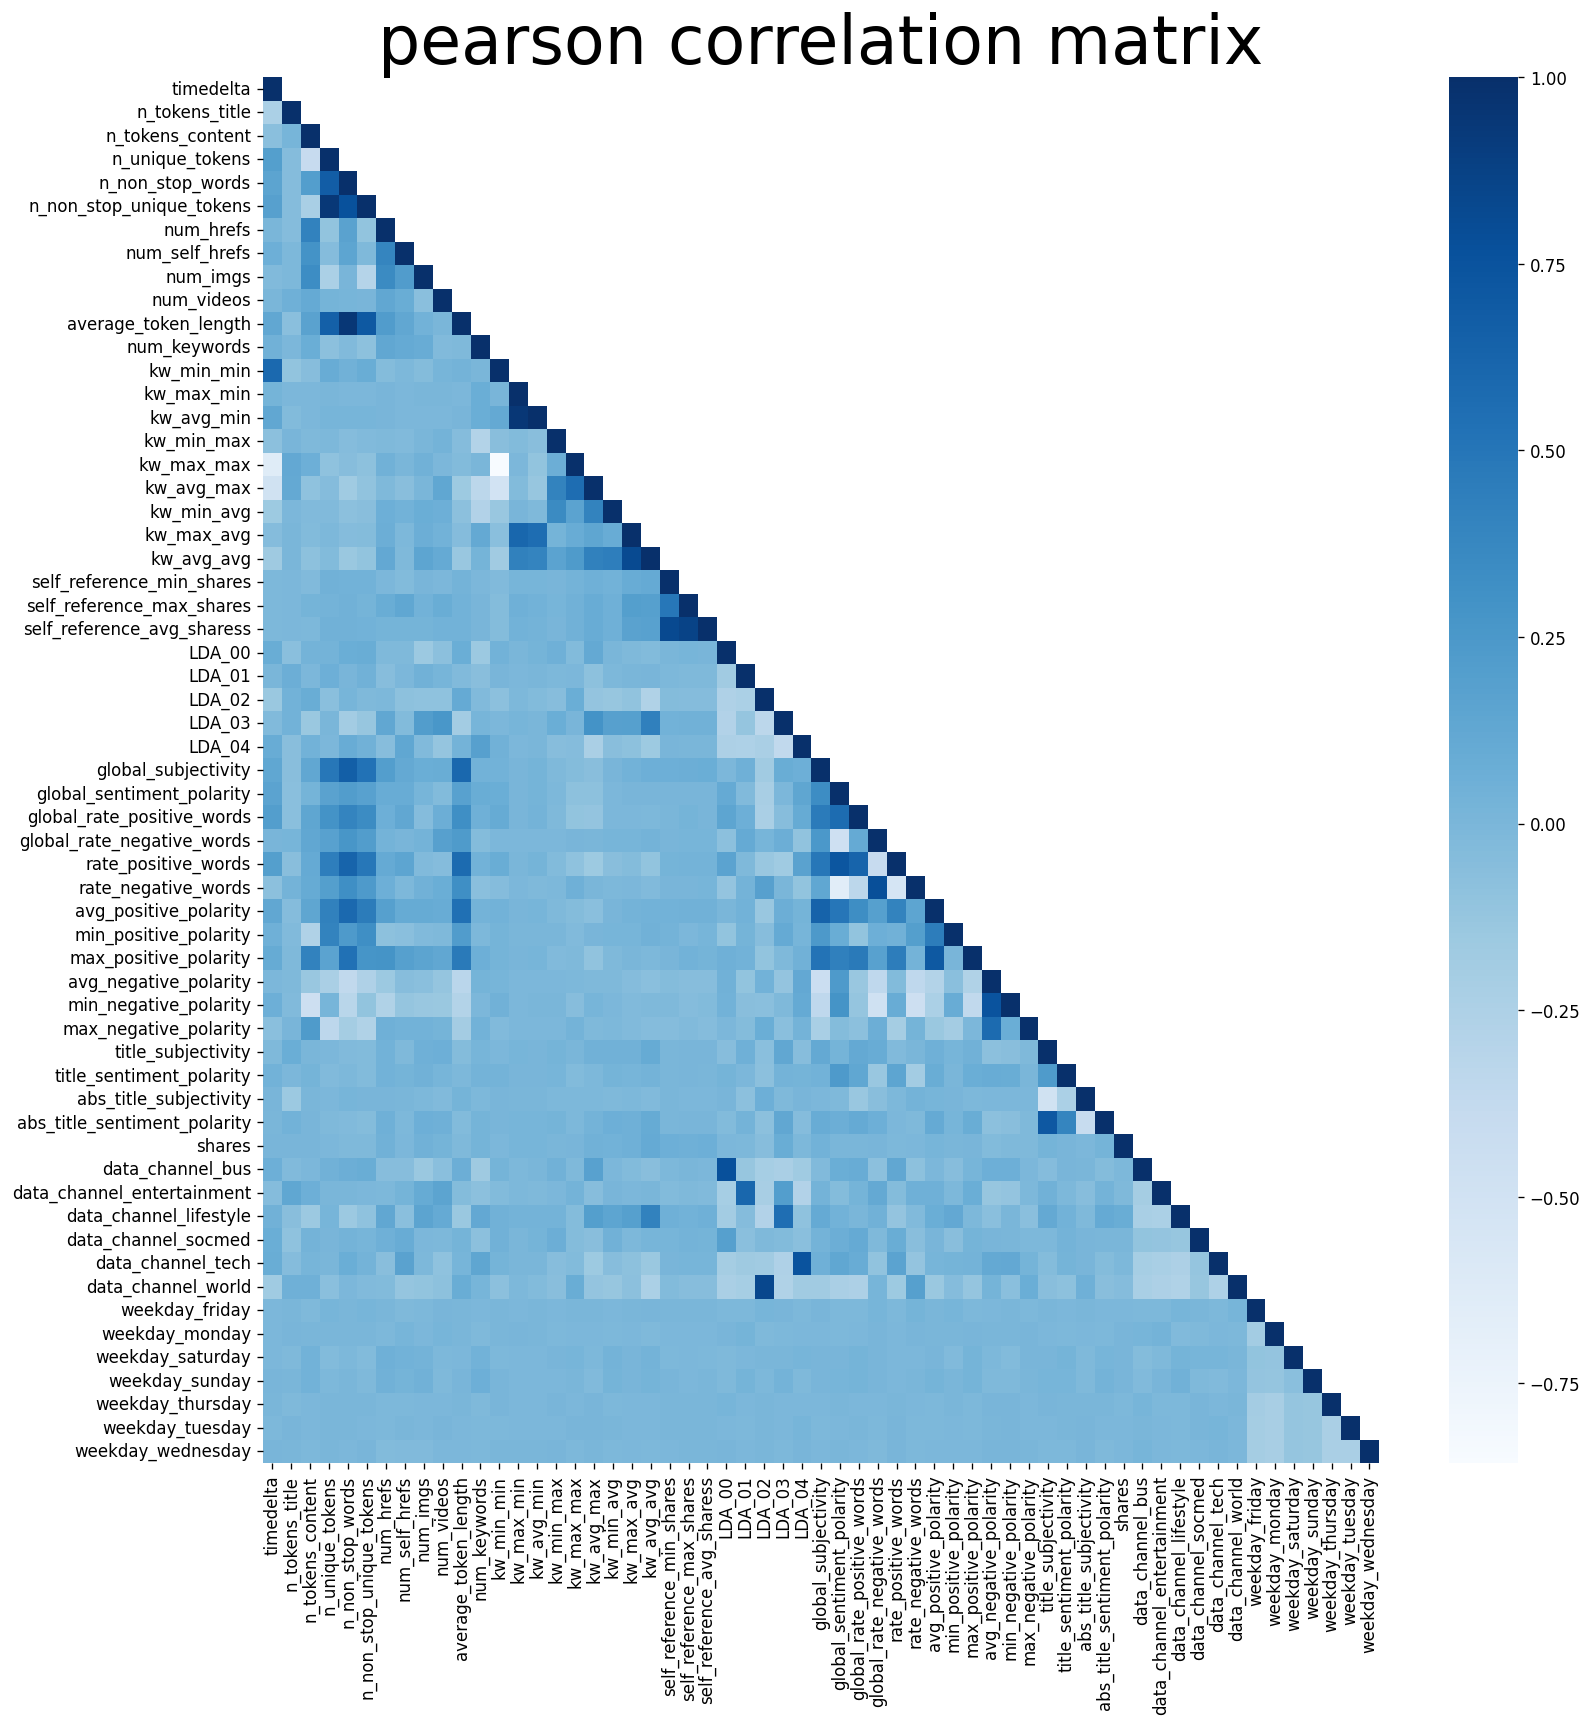

In [59]:
triangle_corr_matrix(df,"pearson")

(59, 59)


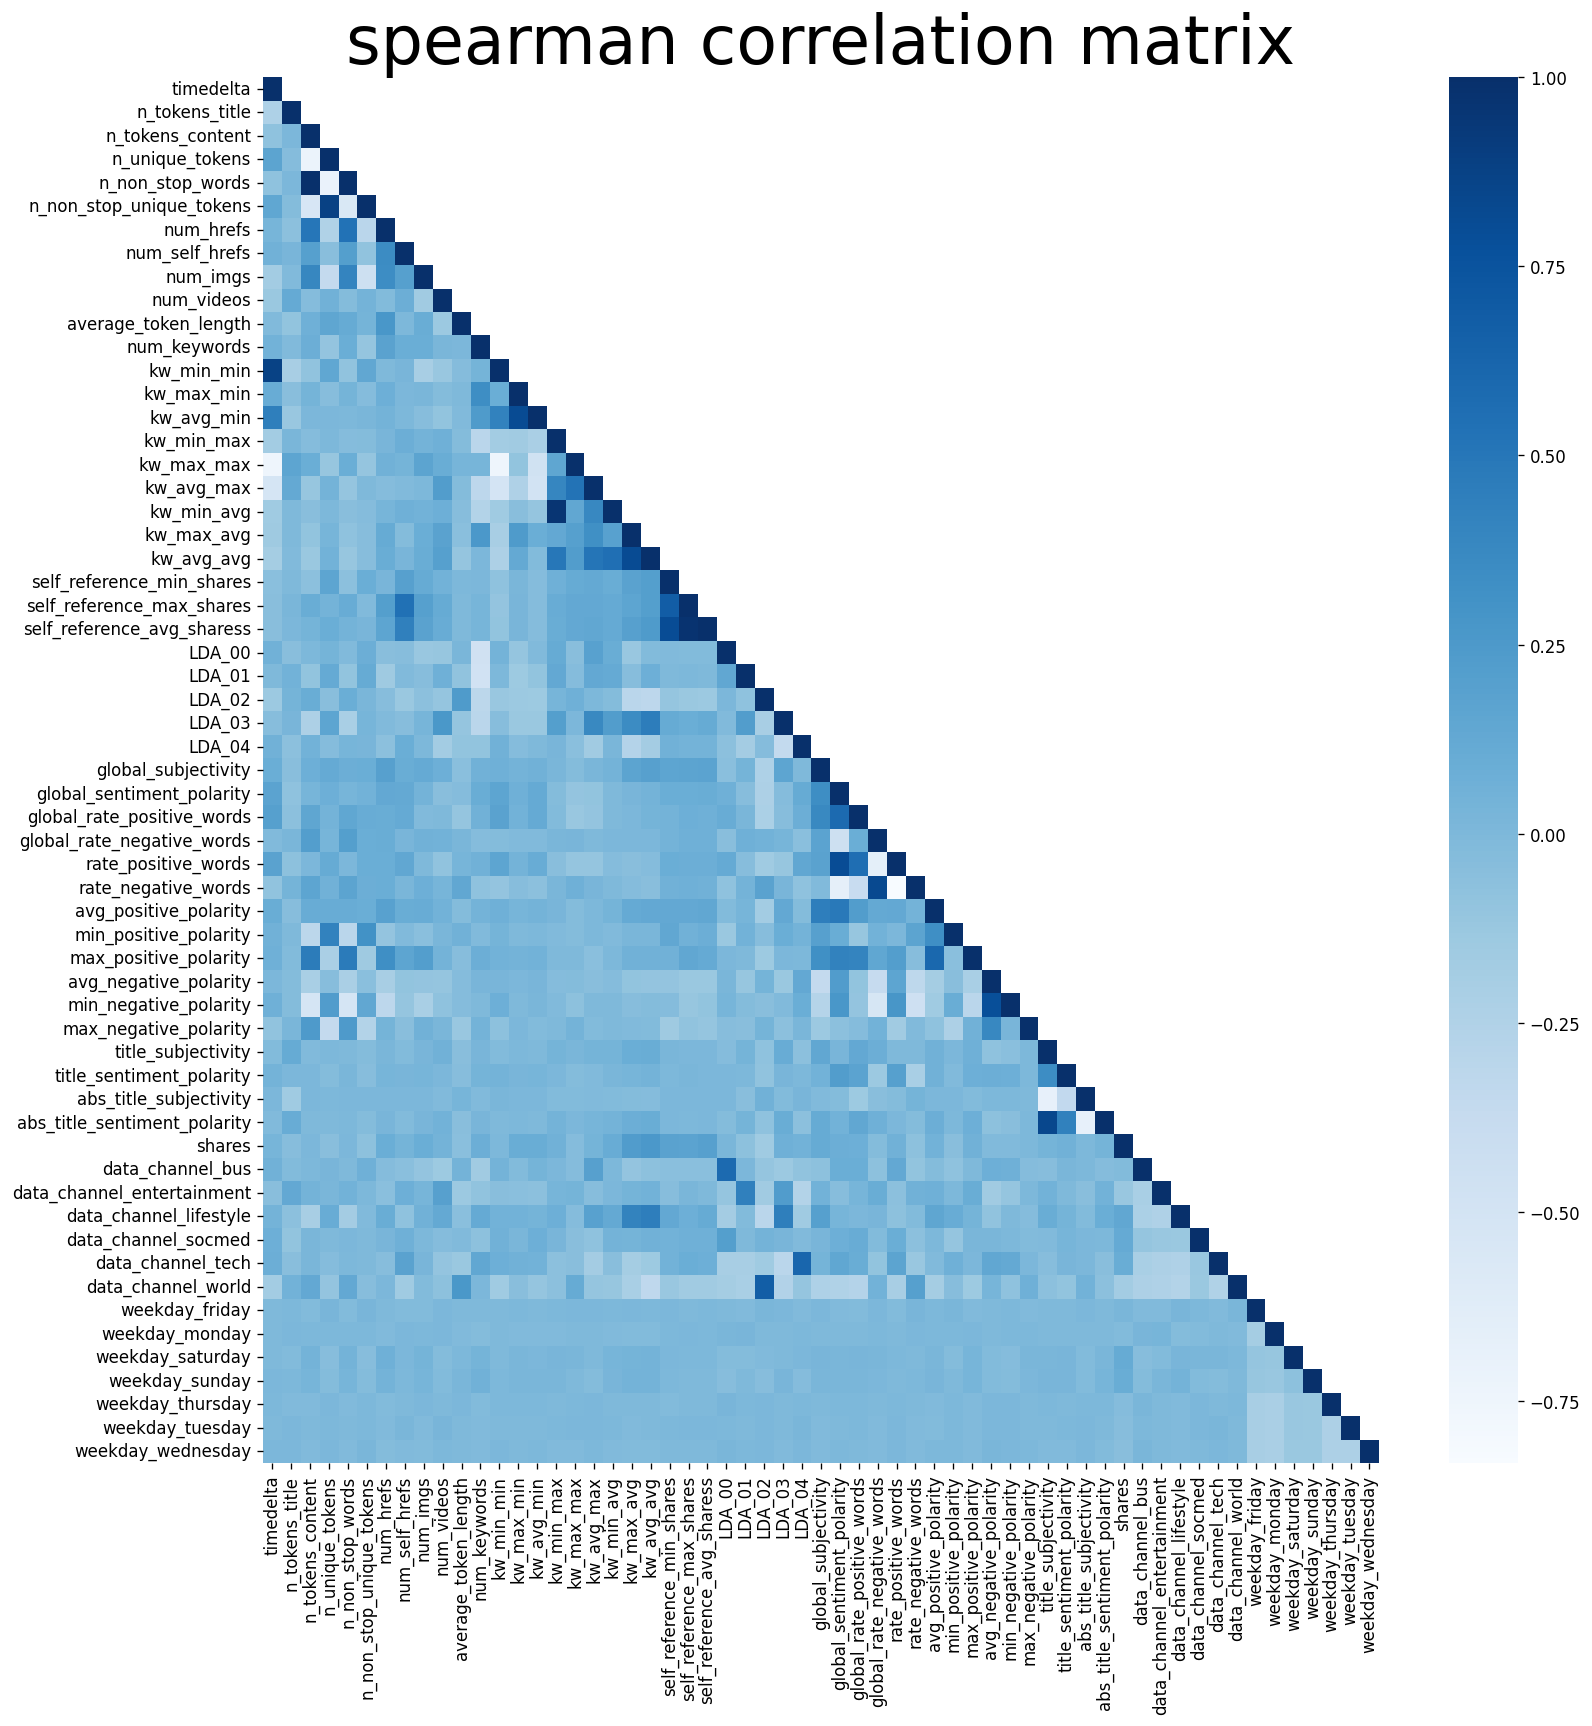

In [60]:
triangle_corr_matrix(df,"spearman")

## Features most correlated with shares

kw_avg_avg                    0.103006
data_channel_lifestyle        0.084398
LDA_03                        0.080471
self_reference_avg_sharess    0.062653
self_reference_min_shares     0.061501
LDA_02                        0.058666
kw_max_avg                    0.056123
Name: shares, dtype: float64
['kw_avg_avg', 'data_channel_lifestyle', 'LDA_03', 'self_reference_avg_sharess', 'self_reference_min_shares', 'LDA_02', 'kw_max_avg', 'shares']


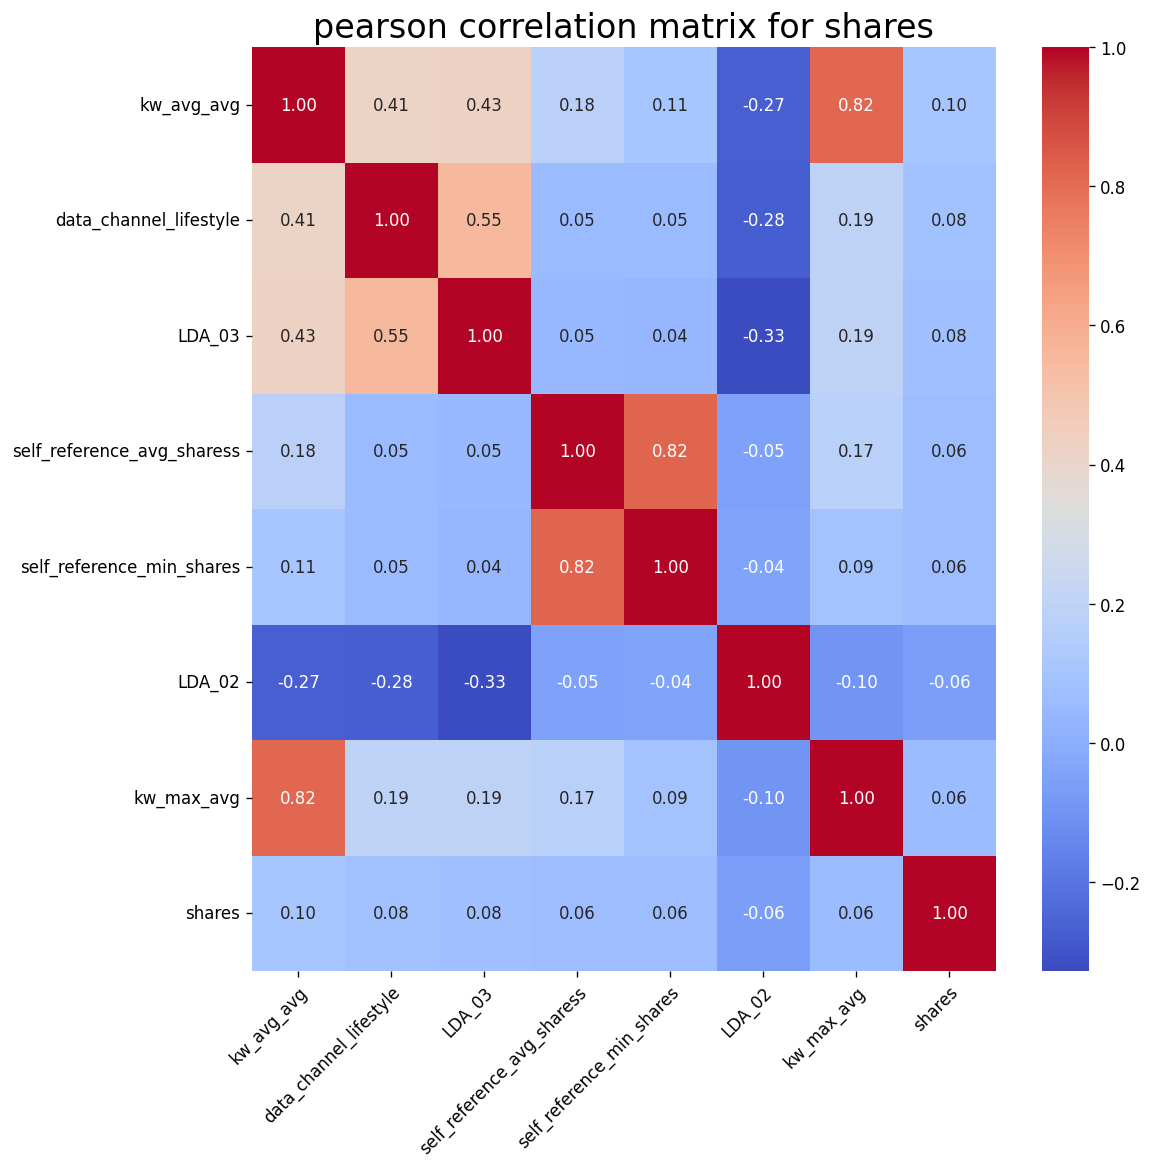

In [61]:
# top 7 features correlated with 'shares' with PEARSON CORRELATION
top_feature_corr(df,"pearson")

kw_avg_avg                    0.259361
kw_max_avg                    0.227842
self_reference_avg_sharess    0.193903
self_reference_min_shares     0.181423
self_reference_max_shares     0.170796
data_channel_world            0.166275
LDA_02                        0.155207
Name: shares, dtype: float64
['kw_avg_avg', 'kw_max_avg', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'data_channel_world', 'LDA_02', 'shares']


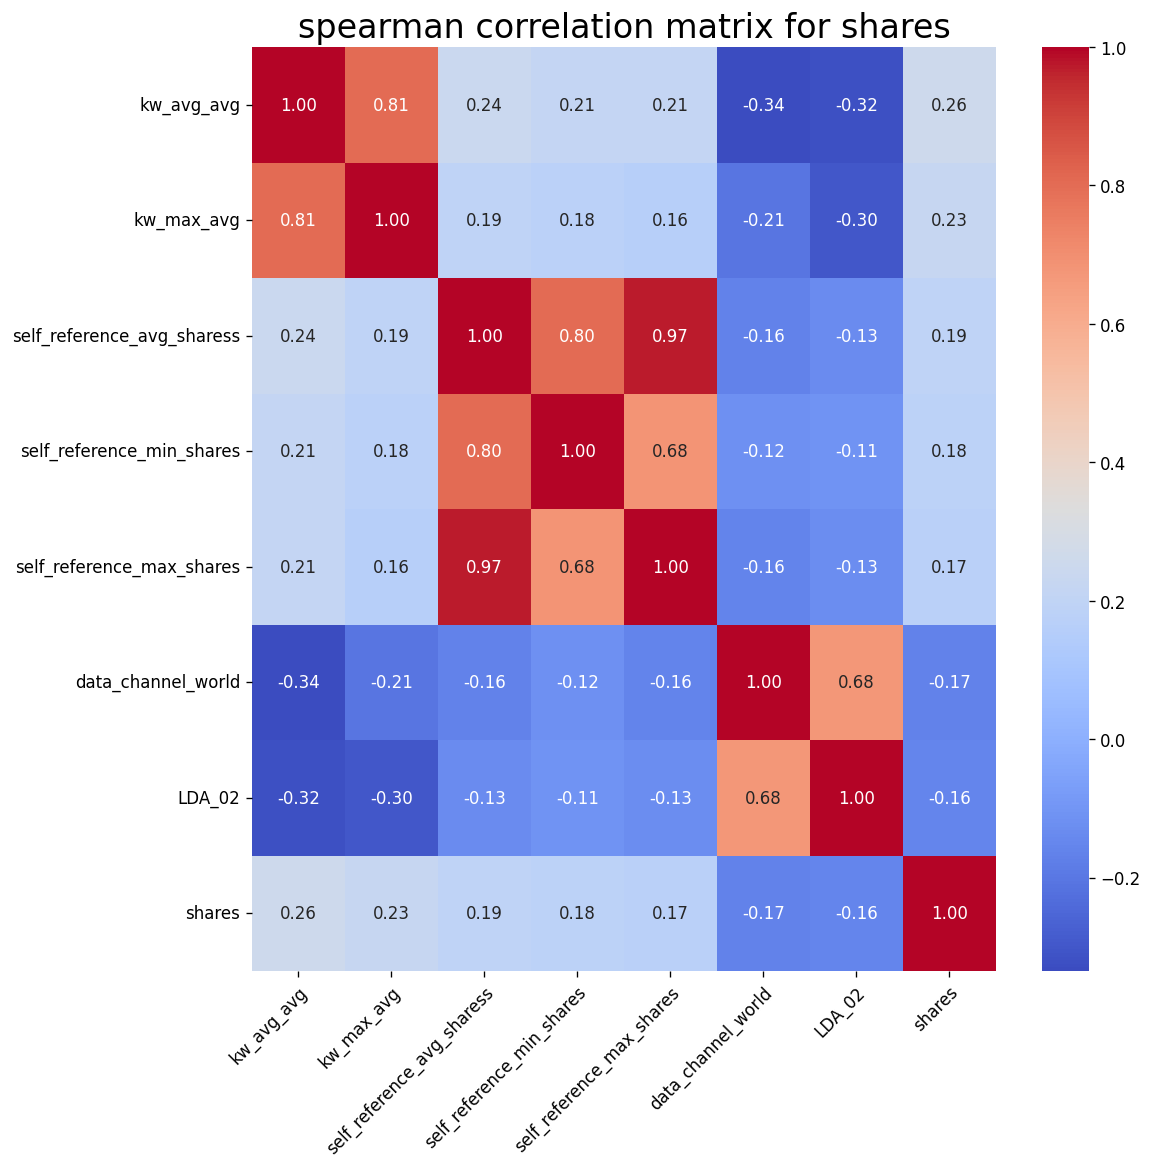

In [62]:
top_feature_corr(df,"spearman")

kw_avg_avg                    0.177827
kw_max_avg                    0.156037
data_channel_world            0.136865
self_reference_avg_sharess    0.135023
self_reference_min_shares     0.126630
self_reference_max_shares     0.118688
data_channel_lifestyle        0.113527
Name: shares, dtype: float64
['kw_avg_avg', 'kw_max_avg', 'data_channel_world', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'data_channel_lifestyle', 'shares']


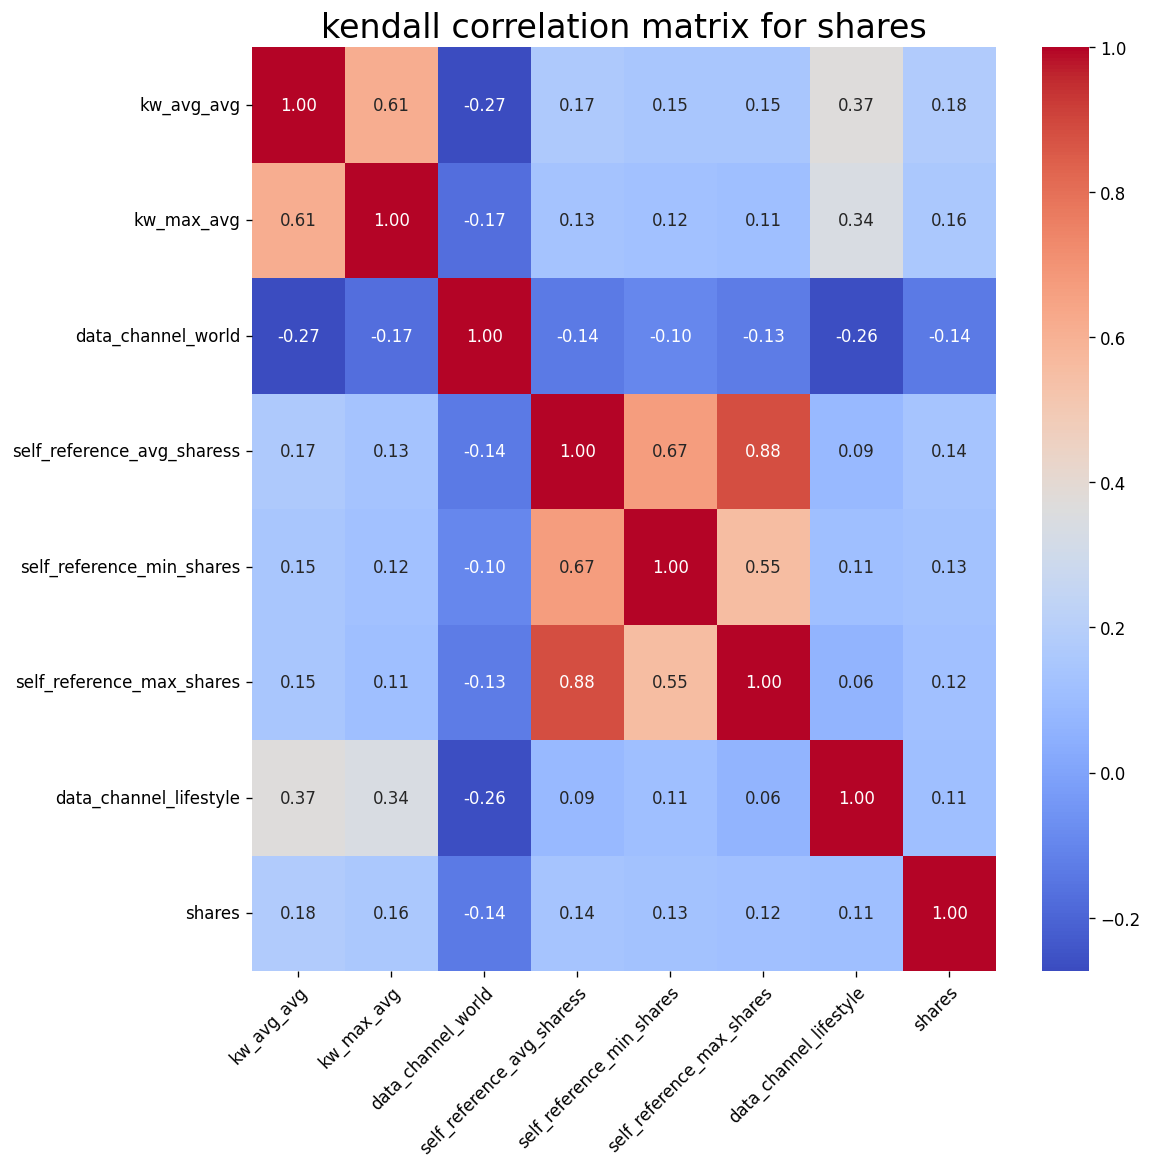

In [63]:
top_feature_corr(df,"kendall")

# FISHER SCORE


In [64]:
path_dev="./data/development.csv"
df = pd.read_csv(path_dev)
df.drop(["url","id"], axis = 1, inplace = True)
NaN_columns = ['num_keywords','num_imgs','num_videos']
for el in NaN_columns:
    mean_values = df.groupby('data_channel')[el].mean()
    for group, mean in mean_values.items():
      df.loc[df['data_channel'] == group, el] = df.loc[df['data_channel'] == group, el].fillna(mean)
NaN_columns = ['num_imgs','num_videos']
for el in NaN_columns:
    mean_values = df.groupby('data_channel')[el].mean()
    for group, mean in mean_values.items():
      df.loc[df['data_channel'] == group, el] = df.loc[df['data_channel'] == group, el].fillna(0)

df = pd.get_dummies(df, columns=['data_channel', 'weekday'])
share_data = df['shares']
share_label = list()
for share in share_data:
    if share <= 645:
        share_label.append('Very Poor')
    elif share > 645 and share <= 861:
        share_label.append('Poor')
    elif share > 861 and share <= 1400:
        share_label.append('Average')
    elif share > 1400 and share <= 31300:
        share_label.append('Good')
    elif share > 31300 and share <= 53700:
        share_label.append('Very Good')
    elif share > 53700 and share <= 77200:
        share_label.append('Excellent')
    else:
        share_label.append('Exceptional')


df_fisher = pd.concat([df, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
df_fisher_without_shares = df_fisher.drop(labels=['shares'], axis = 1, inplace=False)

training_set = df_fisher_without_shares.iloc[:, :(df_fisher_without_shares.shape[1]-1)]
label_set = df_fisher_without_shares.iloc[:, (df_fisher_without_shares.shape[1]-1):].values

fisher_sc = fisher_index_calc(training_set.values, label_set)
relative_indices = np.argsort(fisher_sc)

relative_indices = relative_indices[::-1]
relative_indices = relative_indices[:10]

for el in relative_indices:
    print(df_fisher_without_shares.columns[el])



global_rate_positive_words
global_rate_negative_words
global_sentiment_polarity
global_subjectivity
LDA_02
data_channel_socmed
rate_negative_words
min_positive_polarity
weekday_saturday
weekday_sunday


In [65]:
relative_indices = np.argsort(fisher_sc)
val = sorted(fisher_sc)
relative_indices = relative_indices[::-1]
relative_indices = relative_indices[:10]
val = val[::-1]
val = val[:10]

for i,el in enumerate(relative_indices):
    print(df_fisher_without_shares.columns[el])
    print(val[i])

global_rate_positive_words
446113.2338826365
global_rate_negative_words
318690.66657222656
global_sentiment_polarity
20358.213392141715
global_subjectivity
12883.419055326549
LDA_02
10588.86700787821
data_channel_socmed
8147.439231952574
rate_negative_words
7475.8611243380055
min_positive_polarity
7360.840371952584
weekday_saturday
7124.5941754017895
weekday_sunday
5219.3208932154475


## DATA CHANNEL CORRELATION
The following code provide an explanatory analysis of the correlation between news with the same datachannel

### LIFESTYLE

top 10 features correlated with shares kw_avg_avg                    0.179102
kw_max_avg                    0.154608
self_reference_min_shares     0.144537
self_reference_avg_sharess    0.137685
self_reference_max_shares     0.122582
num_imgs                      0.107091
kw_min_avg                    0.090638
LDA_03                        0.083188
num_hrefs                     0.082541
n_non_stop_unique_tokens      0.082013
Name: shares, dtype: float64


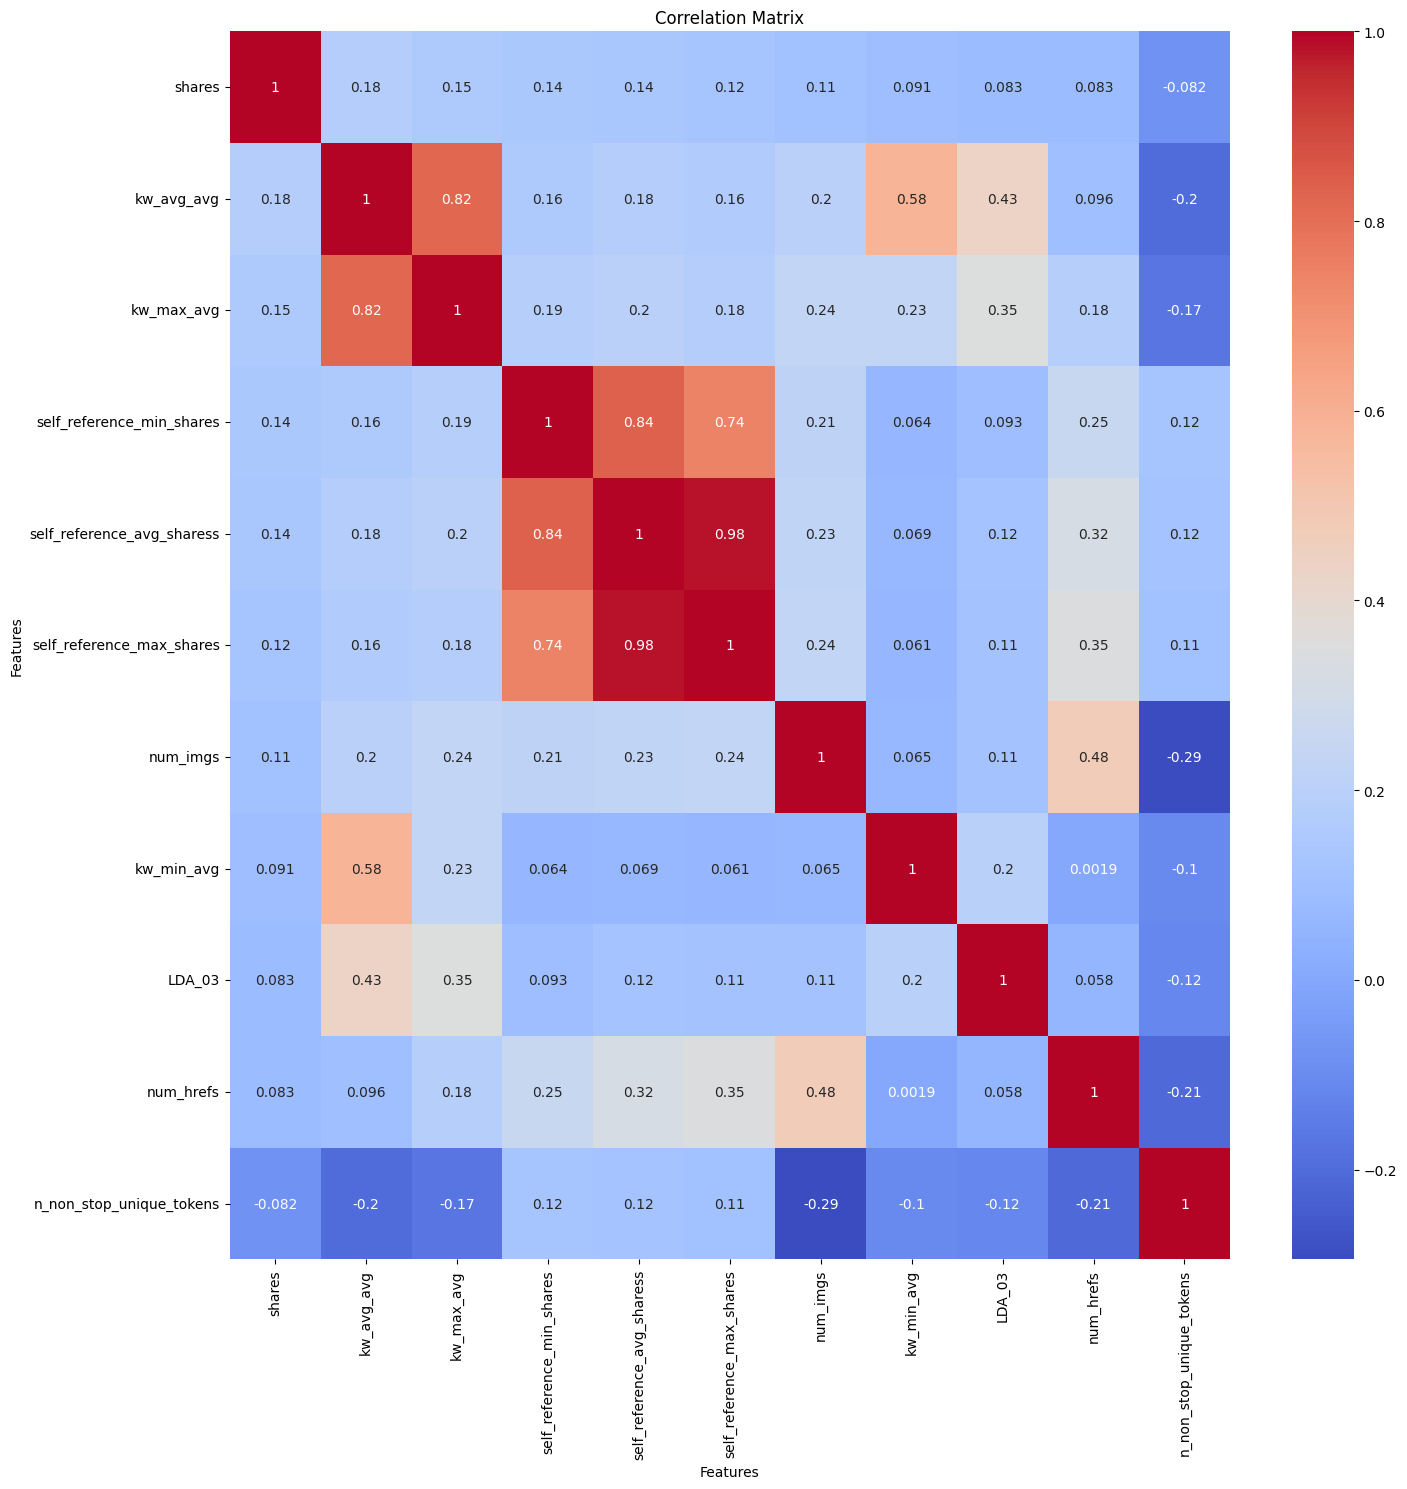

top 10 features correlated with the datachannel analyzed kw_avg_avg                    0.451935
LDA_03                        0.444857
kw_max_avg                    0.419171
LDA_02                        0.305055
data_channel_world            0.264609
data_channel_tech             0.243973
data_channel_entertainment    0.238572
data_channel_bus              0.220783
global_subjectivity           0.204278
n_tokens_content              0.197547
Name: data_channel_lifestyle, dtype: float64


In [66]:
datachannel_correlation('data_channel_lifestyle', df)

### WORLD

top 10 features correlated with shares kw_max_avg                    0.189730
kw_avg_avg                    0.187019
self_reference_avg_sharess    0.173718
self_reference_min_shares     0.159268
self_reference_max_shares     0.156632
LDA_02                        0.151544
weekday_sunday                0.115519
weekday_saturday              0.113527
average_token_length          0.110000
rate_negative_words           0.106102
Name: shares, dtype: float64


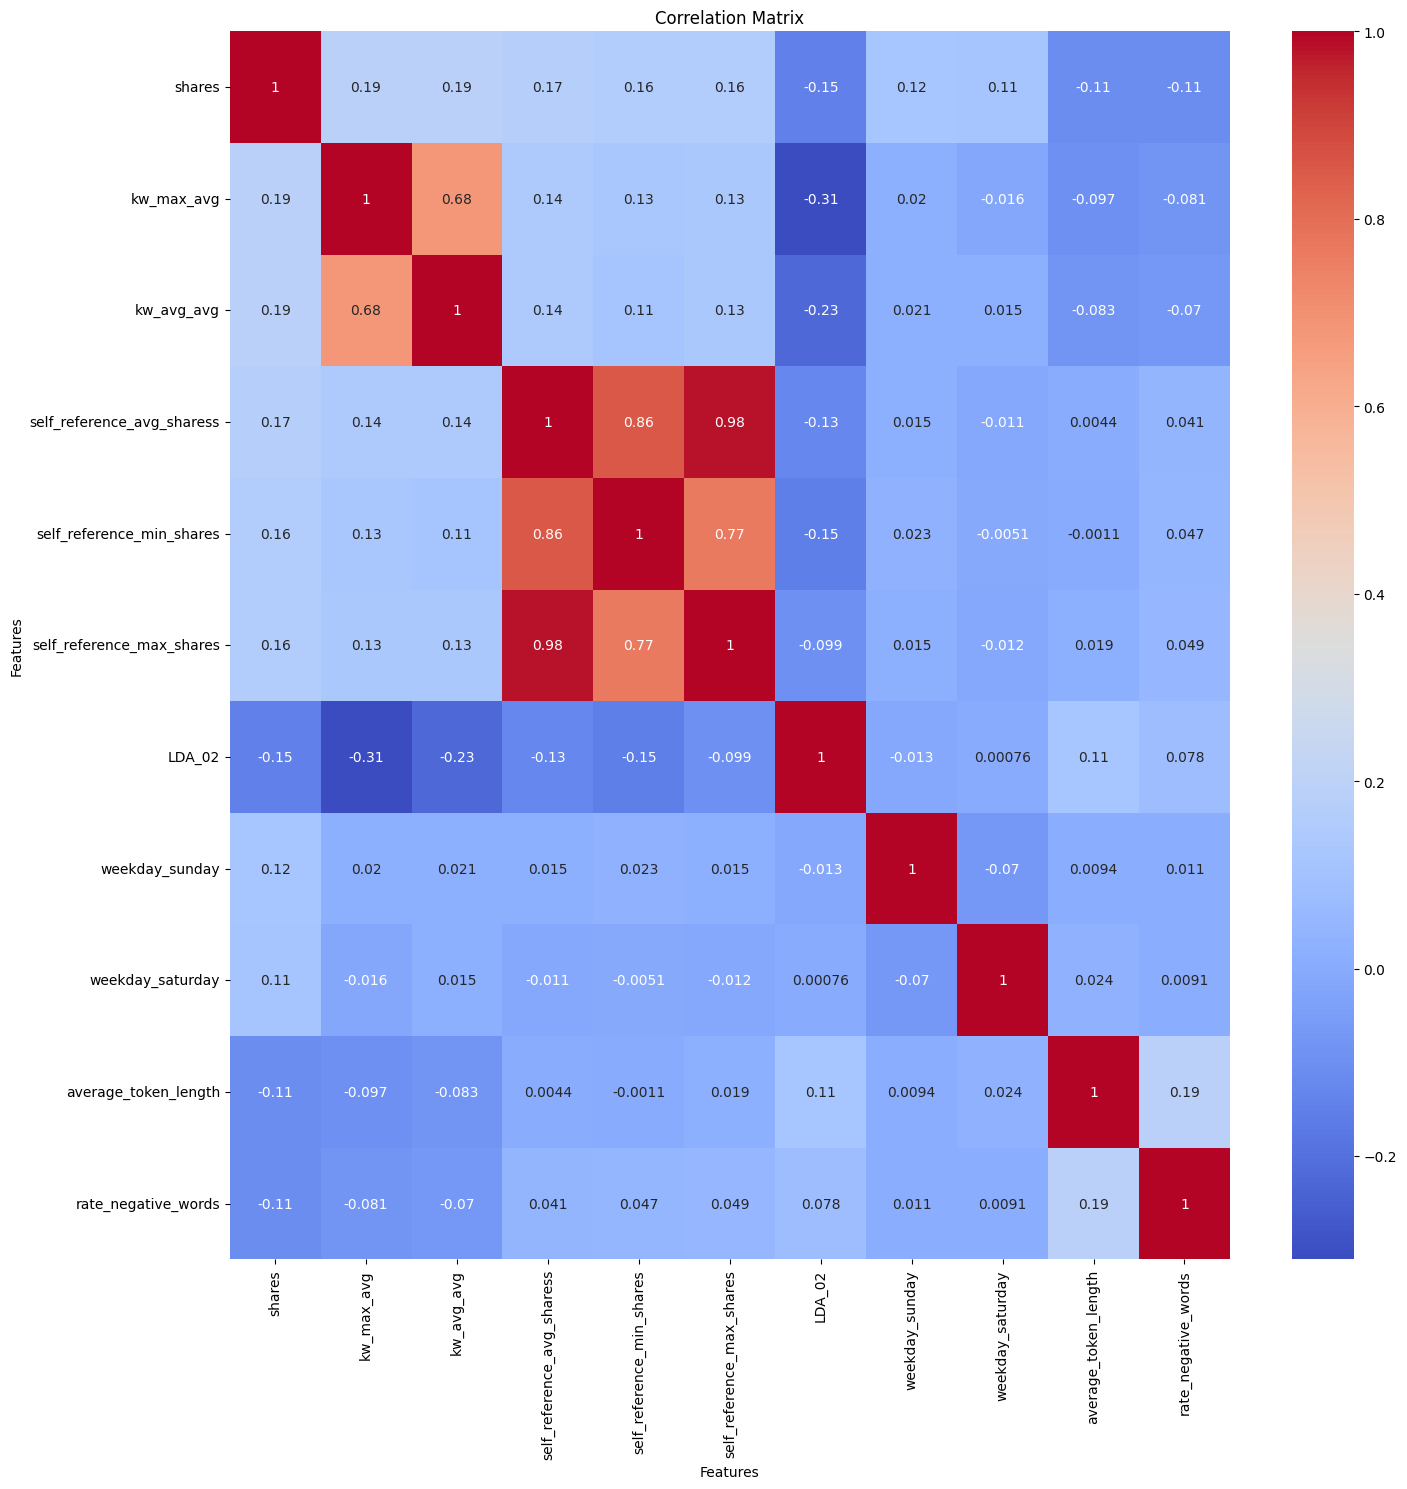

top 10 features correlated with the datachannel analyzed LDA_02                        0.675183
kw_avg_avg                    0.335120
average_token_length          0.269032
global_rate_positive_words    0.267419
data_channel_lifestyle        0.264609
LDA_03                        0.257874
global_sentiment_polarity     0.251696
data_channel_tech             0.247933
data_channel_entertainment    0.242445
global_subjectivity           0.231502
Name: data_channel_world, dtype: float64


In [67]:
datachannel_correlation('data_channel_world',df)

### SOCMED

top 10 features correlated with shares LDA_00                        0.289019
self_reference_min_shares     0.262378
self_reference_avg_sharess    0.261356
min_positive_polarity         0.246396
self_reference_max_shares     0.228649
LDA_03                        0.157914
n_non_stop_unique_tokens      0.156135
avg_positive_polarity         0.148689
kw_avg_avg                    0.146659
LDA_01                        0.142824
Name: shares, dtype: float64


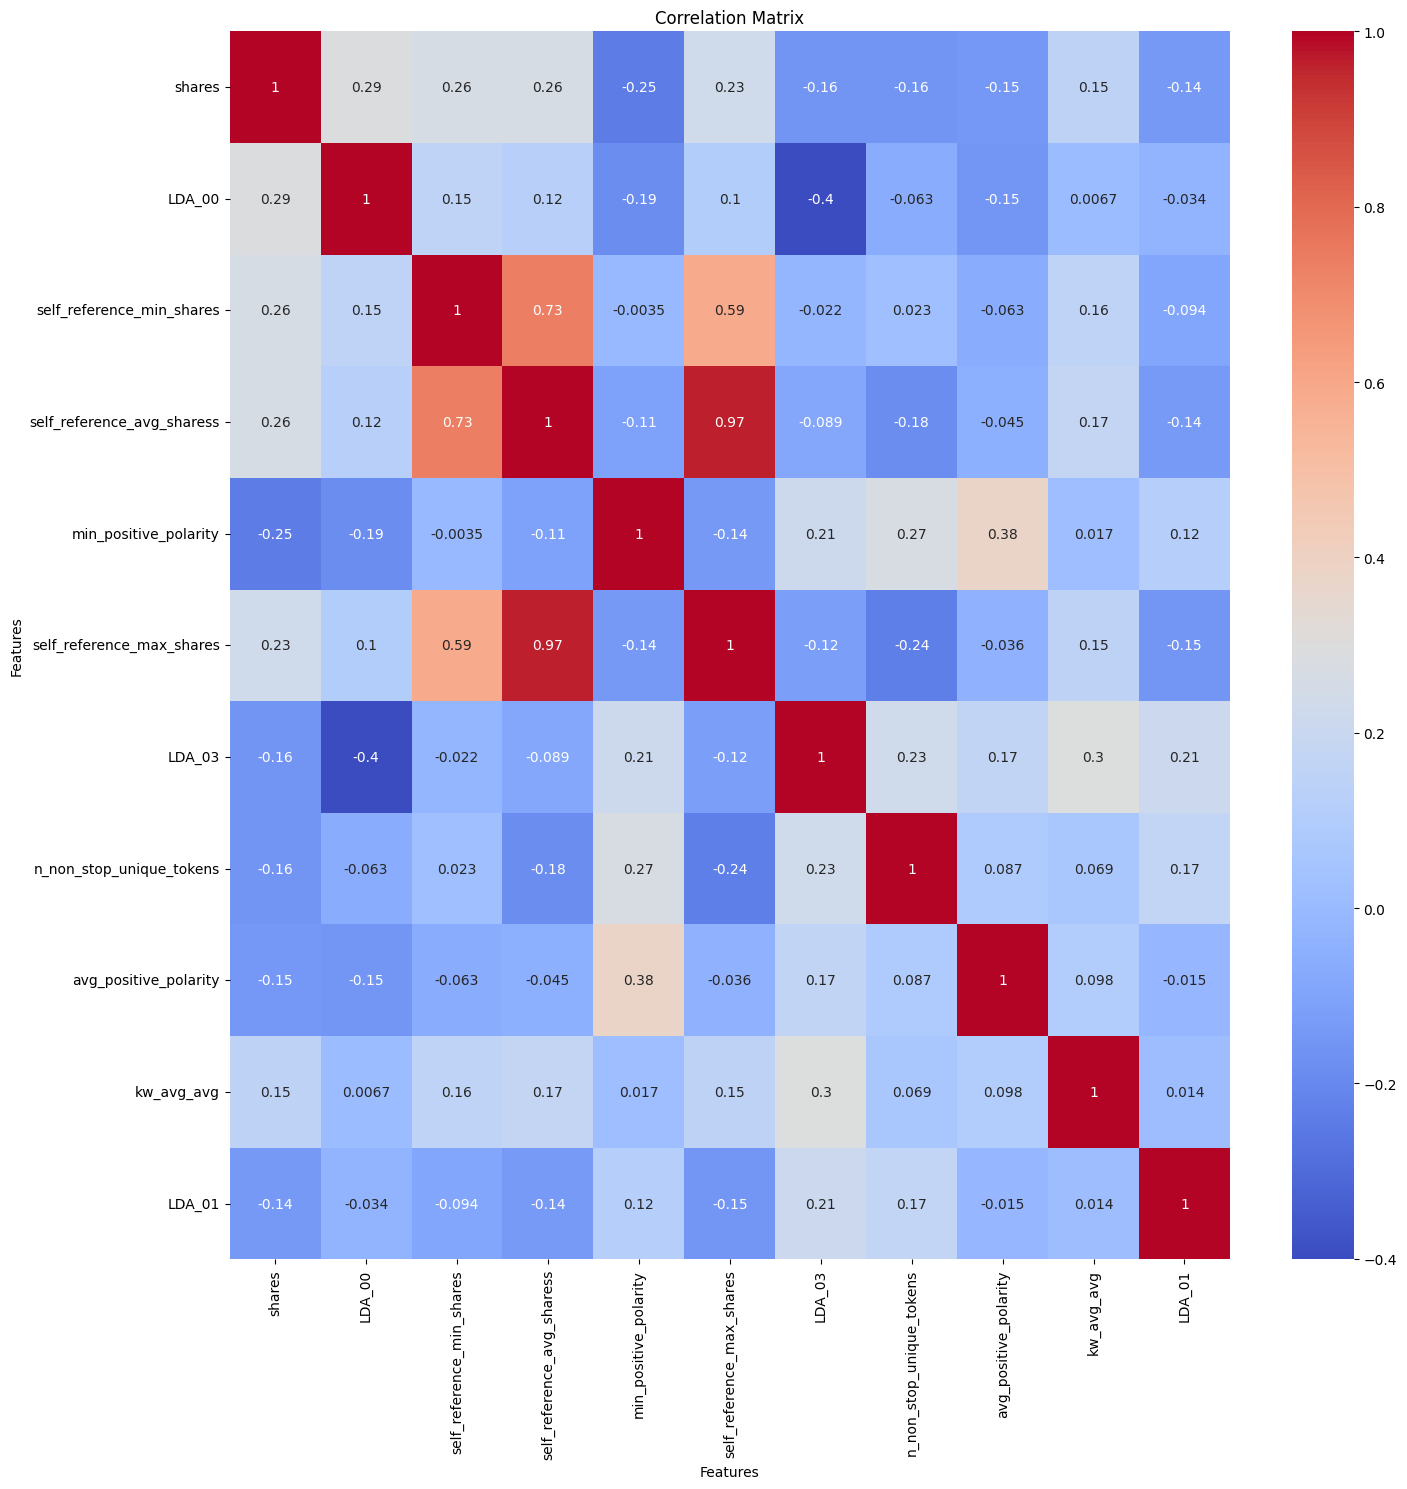

top 10 features correlated with the datachannel analyzed LDA_00                        0.208482
data_channel_world            0.129101
data_channel_lifestyle        0.127038
data_channel_tech             0.119032
data_channel_entertainment    0.116397
shares                        0.113001
data_channel_bus              0.107718
min_positive_polarity         0.107237
global_rate_positive_words    0.100881
n_tokens_title                0.090201
Name: data_channel_socmed, dtype: float64


In [68]:
datachannel_correlation('data_channel_socmed', df)

### SOCMED

top 10 features correlated with shares LDA_00                        0.289019
self_reference_min_shares     0.262378
self_reference_avg_sharess    0.261356
min_positive_polarity         0.246396
self_reference_max_shares     0.228649
LDA_03                        0.157914
n_non_stop_unique_tokens      0.156135
avg_positive_polarity         0.148689
kw_avg_avg                    0.146659
LDA_01                        0.142824
Name: shares, dtype: float64


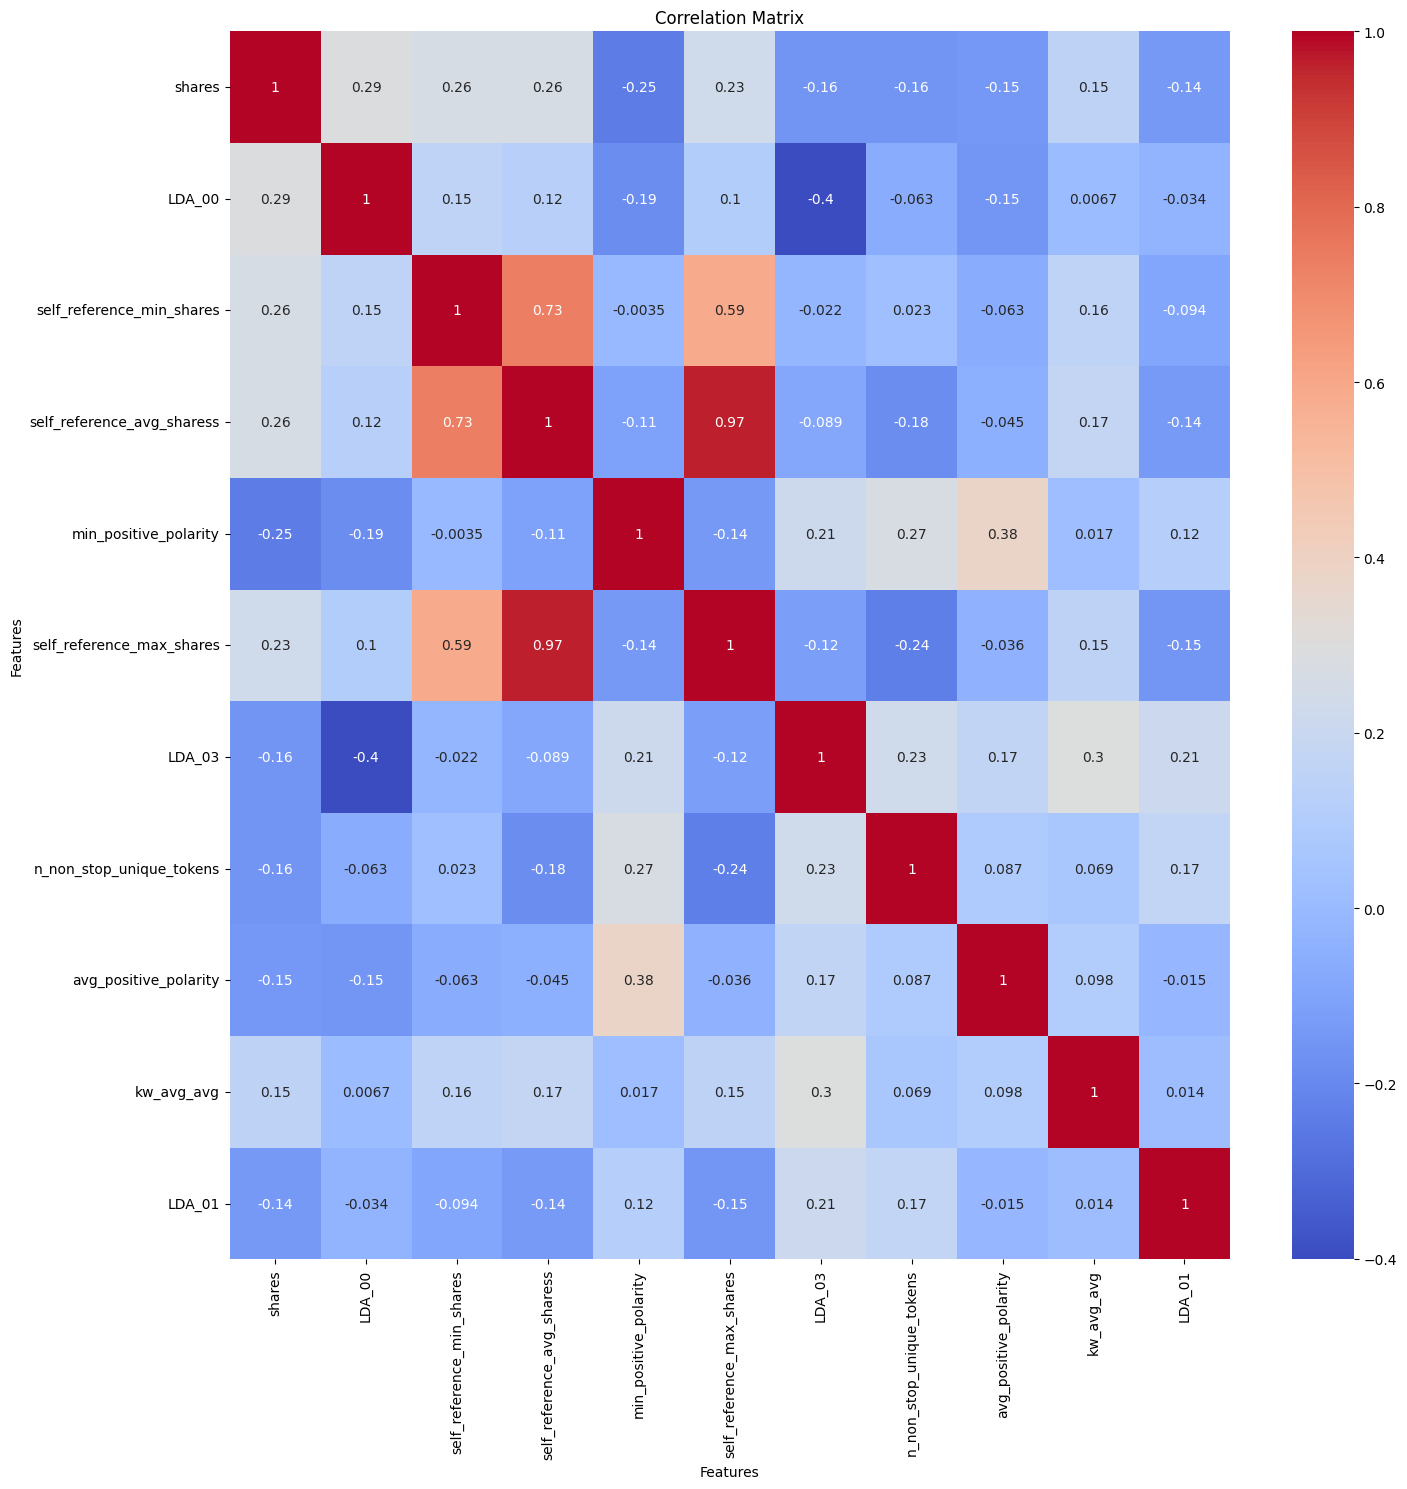

top 10 features correlated with the datachannel analyzed LDA_00                        0.208482
data_channel_world            0.129101
data_channel_lifestyle        0.127038
data_channel_tech             0.119032
data_channel_entertainment    0.116397
shares                        0.113001
data_channel_bus              0.107718
min_positive_polarity         0.107237
global_rate_positive_words    0.100881
n_tokens_title                0.090201
Name: data_channel_socmed, dtype: float64


In [69]:
datachannel_correlation('data_channel_socmed', df)

### TECH

top 10 features correlated with shares kw_avg_avg                    0.212052
kw_max_avg                    0.189262
self_reference_avg_sharess    0.151064
self_reference_min_shares     0.135845
self_reference_max_shares     0.124345
n_tokens_content              0.123633
n_non_stop_words              0.117992
weekday_saturday              0.113285
min_negative_polarity         0.107748
weekday_sunday                0.104512
Name: shares, dtype: float64


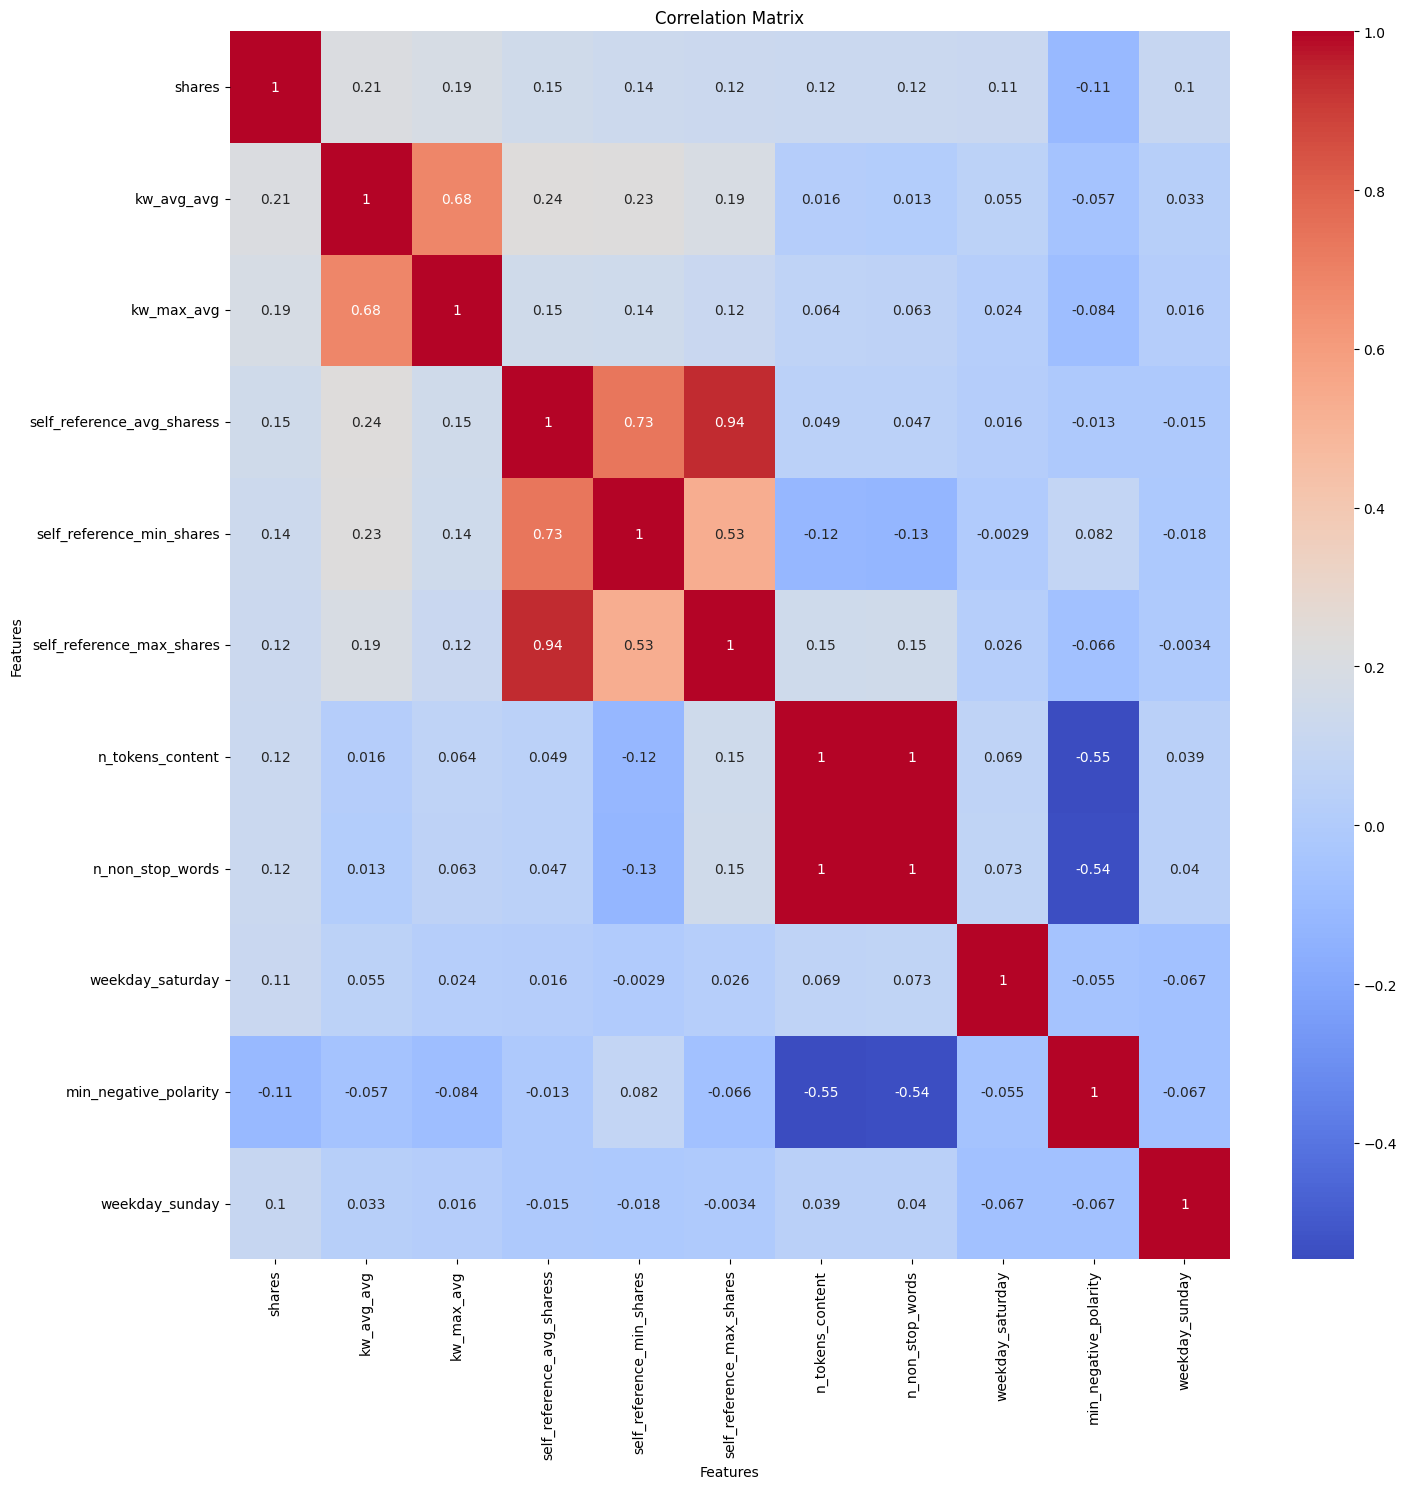

top 10 features correlated with the datachannel analyzed LDA_04                        0.616922
LDA_03                        0.305895
data_channel_world            0.247933
data_channel_lifestyle        0.243973
data_channel_entertainment    0.223537
data_channel_bus              0.206868
LDA_00                        0.196238
LDA_01                        0.195413
kw_max_avg                    0.182733
kw_avg_max                    0.180520
Name: data_channel_tech, dtype: float64


In [70]:
datachannel_correlation('data_channel_tech',df)

# ENTERTAINMENT

top 10 features correlated with shares kw_avg_avg                    0.190630
kw_max_avg                    0.186733
weekday_sunday                0.156147
self_reference_avg_sharess    0.155239
self_reference_max_shares     0.135130
self_reference_min_shares     0.127954
weekday_saturday              0.115489
kw_max_min                    0.091385
kw_avg_min                    0.087011
num_keywords                  0.082944
Name: shares, dtype: float64


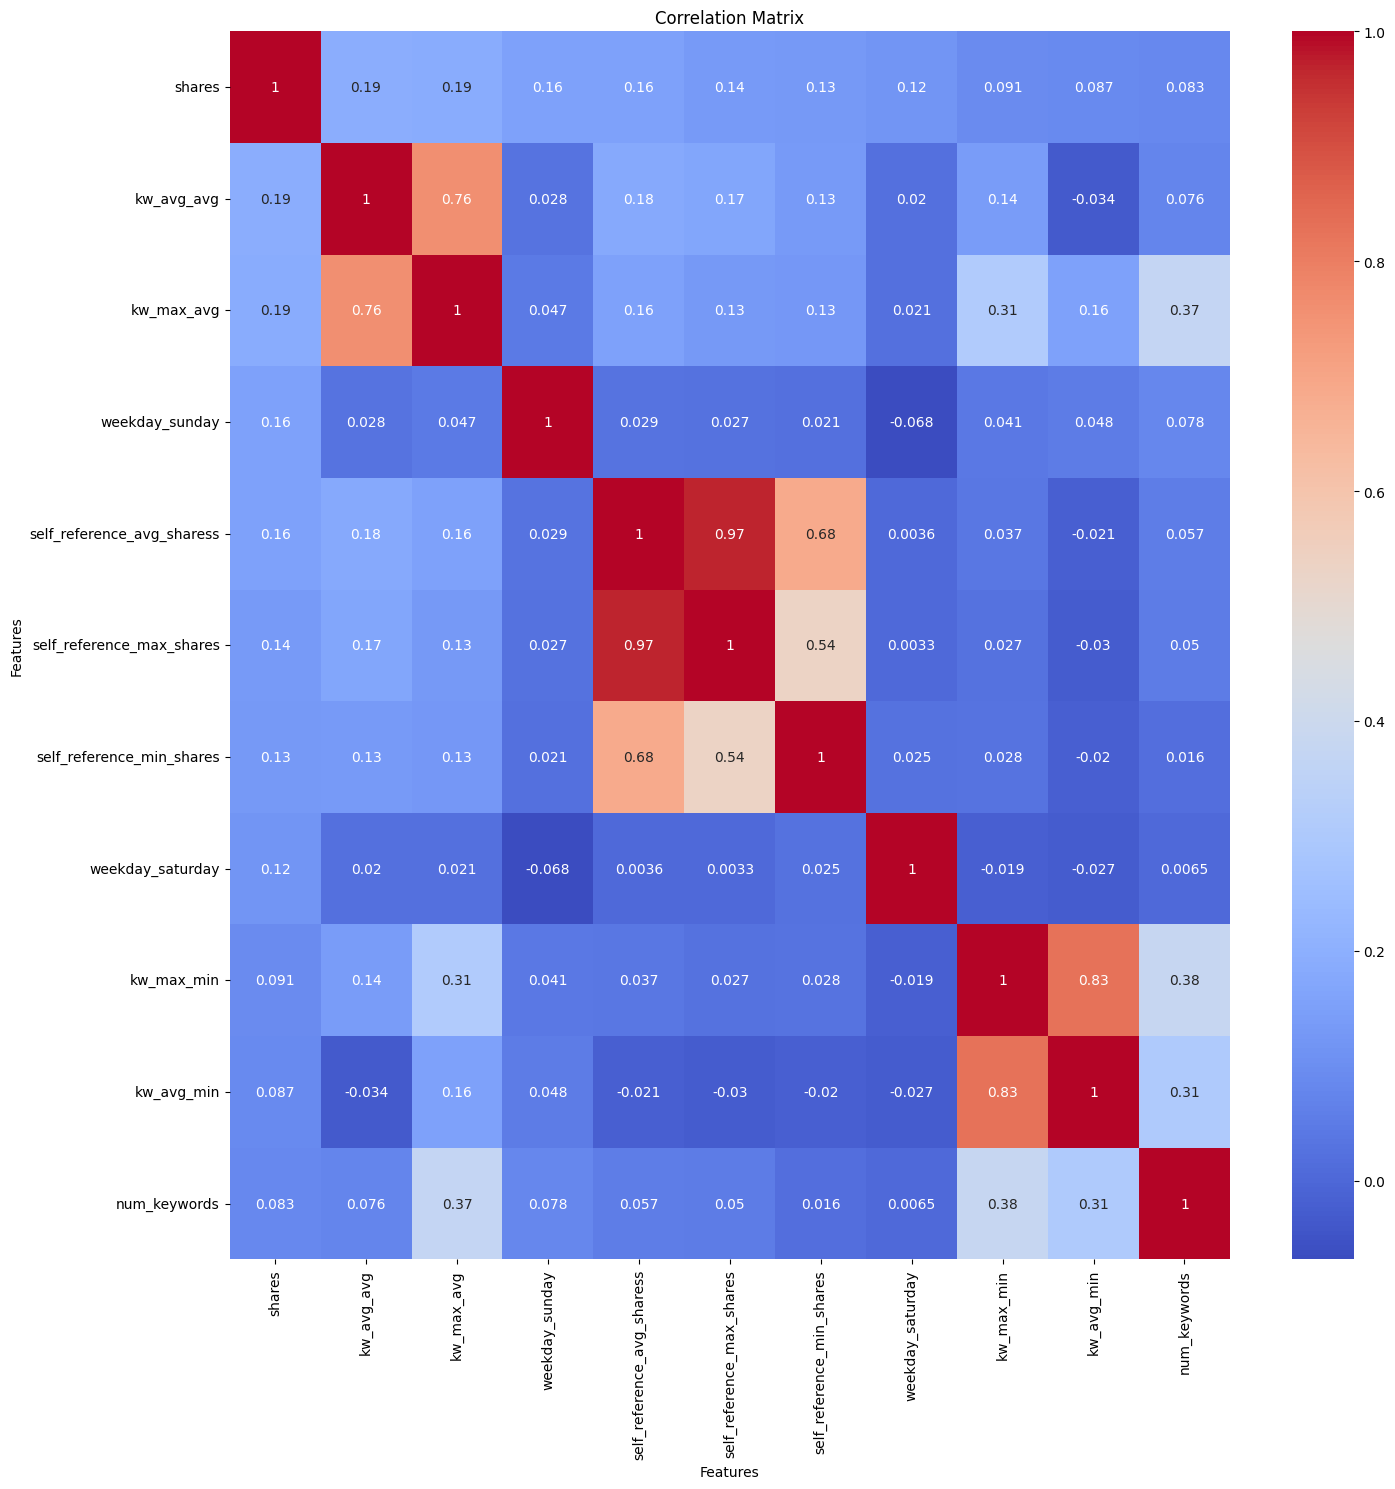

top 10 features correlated with the datachannel analyzed LDA_01                    0.435683
LDA_04                    0.265812
data_channel_world        0.242445
data_channel_lifestyle    0.238572
LDA_03                    0.231292
num_videos                0.225884
data_channel_tech         0.223537
data_channel_bus          0.202289
LDA_02                    0.163200
avg_negative_polarity     0.161071
Name: data_channel_entertainment, dtype: float64


In [71]:
datachannel_correlation('data_channel_entertainment',df)